In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset (assuming it's in CSV format)
df = pd.read_csv('dataset.csv')

# Display the first few rows of the dataset
print(df.head())

# Check the data types of all columns
print(df.dtypes)

# Check for missing values
print(df.isnull().sum())

# Basic statistics for numerical features
print(df.describe())

# Distribution of target column (Label)
print(df['Target'].value_counts())

   Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                           1                       1            1   
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           0                       1            1   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                      13                      10                    6  ...   
1                       

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


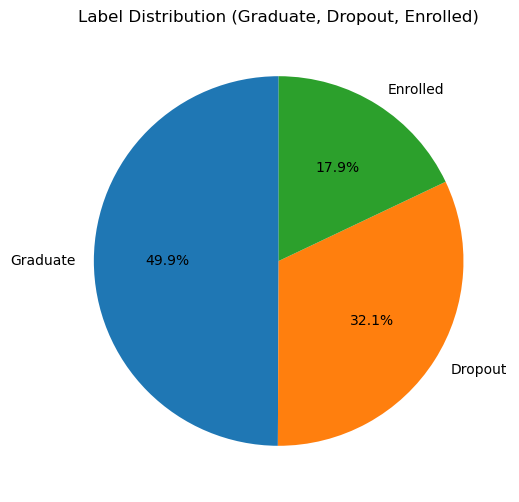

In [3]:
# Distribution of target column (Label)
print(df['Target'].value_counts())
# 2. Pie chart for Label distribution (Graduate, Dropout, Enrolled)
plt.figure(figsize=(8, 6))
df['Target'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Label Distribution (Graduate, Dropout, Enrolled)")
plt.ylabel('')
plt.show()

In [5]:
#8 - List the number of null values in each columns using “ print(data.isnull().sum()) ” 
print(df.isnull().sum())

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [7]:
# Or, you can drop rows with missing values (if too many missing values)
df.dropna(inplace=True)

In [9]:
# For binary columns
from sklearn.preprocessing import LabelEncoder

label_cols = ['Gender', 'Marital status', 'Daytime/evening attendance', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Scholarship holder', 'International']
encoder = LabelEncoder()

for col in label_cols:
    df[col] = encoder.fit_transform(df[col])

# For non-binary categorical variables (e.g., Mother's Occupation), use One-Hot Encoding
df = pd.get_dummies(df, columns=['Mother\'s occupation', 'Father\'s occupation', 'Course', 'Nacionality'], drop_first=True)

In [11]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns to scale
numerical_cols = ['Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 
                  'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 
                  'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (credited)', 
                  'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 
                  'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 
                  'Unemployment rate', 'Inflation rate', 'GDP']

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [13]:
from sklearn.model_selection import train_test_split

# Features (X) and Target (y)
X = df.drop('Target', axis=1)
y = df['Target']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Logistic Regression Classification Report:
              precision    recall  f1-score   support

     Dropout       0.81      0.78      0.79       316
    Enrolled       0.48      0.26      0.34       151
    Graduate       0.78      0.92      0.84       418

    accuracy                           0.76       885
   macro avg       0.69      0.65      0.66       885
weighted avg       0.74      0.76      0.74       885

Confusion Matrix:
[[245  27  44]
 [ 43  40  68]
 [ 16  16 386]]
Accuracy: 0.7581920903954802


In [17]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")

Random Forest Classification Report:
              precision    recall  f1-score   support

     Dropout       0.83      0.76      0.79       316
    Enrolled       0.57      0.30      0.39       151
    Graduate       0.76      0.94      0.84       418

    accuracy                           0.77       885
   macro avg       0.72      0.67      0.68       885
weighted avg       0.75      0.77      0.75       885

Confusion Matrix:
[[241  19  56]
 [ 40  45  66]
 [ 10  15 393]]
Accuracy: 0.7672316384180791


In [19]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")

SVM Classification Report:
              precision    recall  f1-score   support

     Dropout       0.84      0.76      0.80       316
    Enrolled       0.50      0.34      0.40       151
    Graduate       0.78      0.94      0.85       418

    accuracy                           0.77       885
   macro avg       0.71      0.68      0.68       885
weighted avg       0.76      0.77      0.76       885

Confusion Matrix:
[[239  33  44]
 [ 36  51  64]
 [ 10  17 391]]
Accuracy: 0.7694915254237288


In [21]:
from sklearn.model_selection import GridSearchCV

# Example for Random Forest: tuning the number of estimators and max depth
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters for Random Forest:")
print(grid_search.best_params_)

# Evaluate the best model
y_pred_grid = grid_search.best_estimator_.predict(X_test)
print(f"Accuracy after tuning: {accuracy_score(y_test, y_pred_grid)}")

Best parameters for Random Forest:
{'max_depth': 30, 'n_estimators': 200}
Accuracy after tuning: 0.7627118644067796
